In [27]:
your_local_path="C:/Users/tejks/Desktop/ML/practice/"

**Classifying Muffins and Cupcakes with SVM**

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline


__Step 2:__ Import Data

In [3]:
# Read in muffin and cupcake ingredient data
# recipes = pd.read_csv(your_local_path+'recipes_muffins_cupcakes.csv')
recipes = pd.read_csv('attachment_attachment_attachment_recipes_muffins_cupcakes_lyst9454.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [9]:
recipes.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
Type             20 non-null object
Flour            20 non-null int64
Milk             20 non-null int64
Sugar            20 non-null int64
Butter           20 non-null int64
Egg              20 non-null int64
Baking Powder    20 non-null int64
Vanilla          20 non-null int64
Salt             20 non-null int64
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


__Step 3:__ Prepare the Data

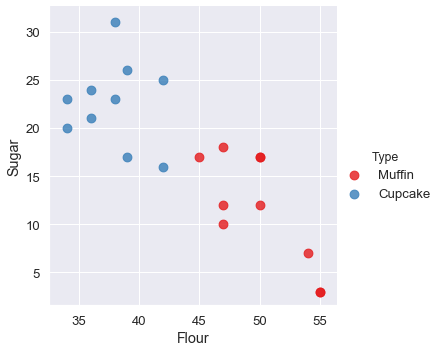

In [4]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 78});

In [5]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar','Butter','Egg']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

C:\Users\xsmaddurve\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [6]:
ingredients

array([[55,  3,  7,  5],
       [47, 12,  6,  9],
       [47, 18,  6,  4],
       [45, 17, 17,  8],
       [50, 12,  6,  5],
       [55,  3,  7,  5],
       [54,  7,  5,  5],
       [47, 10, 10,  4],
       [50, 17,  8,  6],
       [50, 17, 11,  4],
       [39, 26, 19, 14],
       [42, 16, 10,  8],
       [34, 20, 20,  5],
       [39, 17, 19, 10],
       [38, 23, 15,  8],
       [42, 25,  9,  5],
       [36, 21, 14, 11],
       [38, 31,  8,  6],
       [36, 24, 12,  9],
       [34, 23, 11, 13]], dtype=int64)

In [7]:
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
ingredients

array([[55,  3,  7,  5],
       [47, 12,  6,  9],
       [47, 18,  6,  4],
       [45, 17, 17,  8],
       [50, 12,  6,  5],
       [55,  3,  7,  5],
       [54,  7,  5,  5],
       [47, 10, 10,  4],
       [50, 17,  8,  6],
       [50, 17, 11,  4],
       [39, 26, 19, 14],
       [42, 16, 10,  8],
       [34, 20, 20,  5],
       [39, 17, 19, 10],
       [38, 23, 15,  8],
       [42, 25,  9,  5],
       [36, 21, 14, 11],
       [38, 31,  8,  6],
       [36, 24, 12,  9],
       [34, 23, 11, 13]], dtype=int64)

__Step 4:__ Fit the Model

In [34]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(type_label, model.predict(ingredients))

array([[10,  0],
       [ 0, 10]])

In [36]:
from sklearn.cross_validation import cross_val_score
score_svc = cross_val_score(model, ingredients, type_label, cv=4)
print("Cross Validation score : " + str(score_svc))
print("Cross Validation Mean score : " + str(score_svc.mean()))

Cross Validation score : [1.         0.83333333 1.         1.        ]
Cross Validation Mean score : 0.9583333333333334


__Step 5:__ Predict New Case

In [37]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar, butter, egg):
    if(model.predict([[flour, sugar,butter,egg]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [38]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(90, 92, 80, 80)

You're looking at a muffin recipe!


In [39]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20,90,100)

You're looking at a muffin recipe!


In [40]:
recipes_sc = pd.read_csv(your_local_path+'recipes_muffins_cupcakes_scones.csv')
recipes_sc

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [41]:
recipes_sc

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes_sc[['Flour','Sugar','Butter','Egg']].as_matrix()
#type_label = np.where(recipes['Type']=='Muffin', 0, 1)
recipes_sc['Type'] = le.fit_transform(recipes_sc['Type'])
type_label = recipes_sc['Type'].as_matrix()
# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [46]:
ingredients

array([[55,  3,  7,  5],
       [47, 12,  6,  9],
       [47, 18,  6,  4],
       [45, 17, 17,  8],
       [50, 12,  6,  5],
       [55,  3,  7,  5],
       [54,  7,  5,  5],
       [47, 10, 10,  4],
       [50, 17,  8,  6],
       [50, 17, 11,  4],
       [39, 26, 19, 14],
       [42, 16, 10,  8],
       [34, 20, 20,  5],
       [39, 17, 19, 10],
       [38, 23, 15,  8],
       [42, 25,  9,  5],
       [36, 21, 14, 11],
       [38, 31,  8,  6],
       [36, 24, 12,  9],
       [34, 23, 11, 13],
       [29, 46,  6,  0],
       [19, 36,  3, 14],
       [20, 52,  5, 10],
       [19, 50,  5,  6],
       [19, 51,  5,  0]], dtype=int64)

In [45]:
type_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2], dtype=int64)

In [44]:
recipes_sc

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0
5,1,55,27,3,7,5,2,1,0
6,1,54,27,7,5,5,2,0,0
7,1,47,26,10,10,4,1,0,0
8,1,50,17,17,8,6,1,0,0
9,1,50,17,17,11,4,1,0,0


In [53]:
model = svm.SVC(kernel='rbf', decision_function_shape='ovr')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
confusion_matrix(type_label, model.predict(ingredients))


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  5]])

In [55]:
from sklearn.cross_validation import cross_val_score
score_svc = cross_val_score(model, ingredients, type_label, cv=4)
print("Cross Validation score : " + str(score_svc))
print("Cross Validation Mean score : " + str(score_svc.mean()))

Cross Validation score : [0.375      0.57142857 0.4        0.4       ]
Cross Validation Mean score : 0.43660714285714286


In [20]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ingredients,type_label,test_size=0.10,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 4)
(3, 4)
(22,)
(3,)


In [21]:
params={"kernel":('poly','rbf'),"C":[1, 100],"gamma":[0.03,1,10],"decision_function_shape":('ovr','ovo')}## Please keep patience, It'll take long time

In [23]:
from sklearn.grid_search import GridSearchCV
grid=GridSearchCV(model,params)
grid_model=grid.fit(x_train,y_train)
grid_model.best_params_


{'C': 100, 'decision_function_shape': 'ovr', 'gamma': 0.03, 'kernel': 'rbf'}

In [24]:
grid_pred=grid_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

0.6666666666666666
[[0 0 0]
 [0 1 0]
 [1 0 1]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      1.00      1.00         1
          2       1.00      0.50      0.67         2

avg / total       1.00      0.67      0.78         3



C:\Users\tejks\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
